## Intializing

In [2]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [3]:

# Create a directory named 'visualizations' if it doesn't exist
if not os.path.exists('visualizations'):
    os.makedirs('visualizations')


In [4]:
warnings.filterwarnings('ignore')

In [5]:
sns.set_style('darkgrid')

In [6]:
data = pd.read_csv('MergedData.csv')

## Data Prep

In [7]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,BRAND,PACK_SIZE (in grams),MONTH_YEAR,YEAR,MONTH_NAME,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-07-01,116,116179,120232,81,Pringles Original Crisps 134g,2,7.4,Pringles,134,2018-07,2018,July,YOUNG SINGLES/COUPLES,Mainstream
1,2018-07-01,174,174315,175432,71,Twisties Cheese Burger 250g,2,8.6,Twisties,250,2018-07,2018,July,OLDER SINGLES/COUPLES,Premium
2,2018-07-01,89,89003,88123,6,RRD Lime & Pepper 165g,1,3.0,RRD,165,2018-07,2018,July,OLDER SINGLES/COUPLES,Mainstream
3,2018-07-01,30,30005,26519,53,RRD Sweet Chilli & Sour Cream 165g,2,6.0,RRD,165,2018-07,2018,July,OLDER FAMILIES,Premium
4,2018-07-01,21,21037,17576,62,Pringles Mystery Flavour 134g,2,7.4,Pringles,134,2018-07,2018,July,RETIREES,Mainstream


In [8]:
# Filter data for STORE_NBR with 12 unique values in MONTH_YEAR
store_month_counts = data.groupby('STORE_NBR')['MONTH_YEAR'].nunique()
valid_stores = store_month_counts[store_month_counts == 12].index
valid_stores

Index([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,
       ...
       263, 264, 265, 266, 267, 268, 269, 270, 271, 272],
      dtype='int64', name='STORE_NBR', length=259)

In [9]:
# Filter the data for valid stores
filtered_data = data[data['STORE_NBR'].isin(valid_stores)]

In [10]:
# Group by STORE_NBR and MONTH_YEAR to calculate required metrics
monthly_metrics = filtered_data.groupby(['STORE_NBR', 'MONTH_YEAR']).agg(
    monthly_sales_revenue=pd.NamedAgg(column='TOT_SALES', aggfunc='sum'),
    number_of_customers=pd.NamedAgg(column='LYLTY_CARD_NBR', aggfunc='nunique'),
    total_transactions=pd.NamedAgg(column='TXN_ID', aggfunc='nunique')
).reset_index()

# Calculate average number of transactions per customer
monthly_metrics['avg_transactions_per_customer'] = (
    monthly_metrics['total_transactions'] / monthly_metrics['number_of_customers']
)

monthly_metrics.head(12)


,STORE_NBR,MONTH_YEAR,monthly_sales_revenue,number_of_customers,total_transactions,avg_transactions_per_customer
0,1,2018-07,188.9,47,49,1.042553
1,1,2018-08,168.4,41,41,1.000000
2,1,2018-09,264.3,56,58,1.035714
3,1,2018-10,175.4,39,40,1.025641
4,1,2018-11,184.8,44,45,1.022727
5,1,2018-12,160.6,37,40,1.081081
6,1,2019-01,142.1,33,33,1.000000
7,1,2019-02,190.9,49,50,1.020408
8,1,2019-03,185.2,43,47,1.093023
9,1,2019-04,177.4,39,40,1.025641


In [11]:
pretri_77 = monthly_metrics[(monthly_metrics['STORE_NBR'] == 77) & (monthly_metrics['MONTH_YEAR'].between('2018-07', '2019-01'))]
pretri_86 = monthly_metrics[(monthly_metrics['STORE_NBR'] == 86) & (monthly_metrics['MONTH_YEAR'].between('2018-07', '2019-01'))]
pretri_88 = monthly_metrics[(monthly_metrics['STORE_NBR'] == 88) & (monthly_metrics['MONTH_YEAR'].between('2018-07', '2019-01'))]

In [12]:
pretri_86

,STORE_NBR,MONTH_YEAR,monthly_sales_revenue,number_of_customers,total_transactions,avg_transactions_per_customer
960,86,2018-07,839.60,92,118,1.282609
961,86,2018-08,711.65,90,102,1.133333
962,86,2018-09,855.00,100,120,1.200000
963,86,2018-10,898.80,105,130,1.238095
964,86,2018-11,851.20,95,118,1.242105
965,86,2018-12,812.20,93,115,1.236559
966,86,2019-01,800.60,89,120,1.348315


In [13]:
pre_monthly_metrics = monthly_metrics[~monthly_metrics['STORE_NBR'].isin([77, 86, 88]) & 
                        monthly_metrics['MONTH_YEAR'].between('2018-07', '2019-01')]

## Correlation

In [14]:
# Function to calculate scored correlations for a given pretri dataset
def calculate_scored_correlations(pretri_data, pre_monthly_metrics):
    scored_correlations = []
    
    # Iterate over each unique STORE_NBR in pre_monthly_metrics
    for store_nbr in pre_monthly_metrics['STORE_NBR'].unique():
        # Filter the data for the current store
        store_data = pre_monthly_metrics[pre_monthly_metrics['STORE_NBR'] == store_nbr]
        
        # Merge pretri_data with the current store data on MONTH_YEAR
        merged_data = pretri_data.merge(store_data, on='MONTH_YEAR', suffixes=('_pretri', f'_{store_nbr}'))
        
        # Calculate Pearson correlations for monthly_sales_revenue, number_of_customers, and total_transactions
        if not merged_data.empty:
            sales_corr = merged_data['monthly_sales_revenue_pretri'].corr(merged_data[f'monthly_sales_revenue_{store_nbr}'])
            customers_corr = merged_data['number_of_customers_pretri'].corr(merged_data[f'number_of_customers_{store_nbr}'])
            
            # Calculate scores based on the correlations
            sales_score = (sales_corr + 1) / 2  # Normalize to range [0, 1], higher correlation gets higher score
            customers_score = (customers_corr + 1) / 2  # Normalize to range [0, 1], higher correlation gets higher score
            
            scored_correlations.append({
                'STORE_NBR': store_nbr, 
                'Sales_Score': sales_score,
                'Customers_Score': customers_score,
            })
    
    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(scored_correlations)

# Calculate scored correlations for pretri_77, pretri_86, and pretri_88
scored_corr_table_77 = calculate_scored_correlations(pretri_77, pre_monthly_metrics)
scored_corr_table_86 = calculate_scored_correlations(pretri_86, pre_monthly_metrics)
scored_corr_table_88 = calculate_scored_correlations(pretri_88, pre_monthly_metrics)




## Magnitude Difference

In [15]:
# Function to calculate and score magnitude differences for a given pretri dataset
def calculate_and_score_magnitude_differences(pretri_data, pre_monthly_metrics):
    scores = []
    
    # Iterate over each unique STORE_NBR in pre_monthly_metrics
    for store_nbr in pre_monthly_metrics['STORE_NBR'].unique():
        # Filter the data for the current store
        store_data = pre_monthly_metrics[pre_monthly_metrics['STORE_NBR'] == store_nbr]
        
        # Merge pretri_data with the current store data on MONTH_YEAR
        merged_data = pretri_data.merge(store_data, on='MONTH_YEAR', suffixes=('_pretri', f'_{store_nbr}'))
        
        # Calculate magnitude differences for monthly_sales_revenue, number_of_customers, and total_transactions
        if not merged_data.empty:
            sales_diff = (merged_data['monthly_sales_revenue_pretri'] - merged_data[f'monthly_sales_revenue_{store_nbr}']).abs().mean()
            customers_diff = (merged_data['number_of_customers_pretri'] - merged_data[f'number_of_customers_{store_nbr}']).abs().mean()
            
            # Calculate scores based on magnitude differences
            sales_score = 1 - (sales_diff / (sales_diff + 1))  # Higher score for lower difference
            customers_score = 1 - (customers_diff / (customers_diff + 1))  # Higher score for lower difference
            
            scores.append({
                'STORE_NBR': store_nbr, 
                'Sales_Score': sales_score,
                'Customers_Score': customers_score,
            })
    
    # Convert the list of dictionaries to a DataFrame
    return pd.DataFrame(scores)

# Calculate and score magnitude differences for pretri_77, pretri_86, and pretri_88
scored_mag_table_77 = calculate_and_score_magnitude_differences(pretri_77, pre_monthly_metrics)
scored_mag_table_86 = calculate_and_score_magnitude_differences(pretri_86, pre_monthly_metrics)
scored_mag_table_88 = calculate_and_score_magnitude_differences(pretri_88, pre_monthly_metrics)


## Composite Scoring

In [16]:
comp_77 = pd.DataFrame({
    'store_nbr': scored_corr_table_77['STORE_NBR'],
    'Sales_Score': (scored_corr_table_77['Sales_Score'] + scored_mag_table_77['Sales_Score']) / 2,
    'Customers_Score': (scored_corr_table_77['Customers_Score'] + scored_mag_table_77['Customers_Score']) / 2,
})

comp_86 = pd.DataFrame({
    'store_nbr': scored_corr_table_86['STORE_NBR'],
    'Sales_Score': (scored_corr_table_86['Sales_Score'] + scored_mag_table_86['Sales_Score']) / 2,
    'Customers_Score': (scored_corr_table_86['Customers_Score'] + scored_mag_table_86['Customers_Score']) / 2,
})

comp_88 = pd.DataFrame({
    'store_nbr': scored_corr_table_88['STORE_NBR'],
    'Sales_Score': (scored_corr_table_88['Sales_Score'] + scored_mag_table_88['Sales_Score']) / 2,
    'Customers_Score': (scored_corr_table_88['Customers_Score'] + scored_mag_table_88['Customers_Score']) / 2,
})

## Control Declaration 

In [17]:
# Get the store number with the top Sales_Score from comp_77
sales_ctrl_77 = comp_77.nlargest(1, 'Sales_Score')['store_nbr'].tolist()

# Get the store number with the top Customers_Score from comp_77
customers_ctrl_77 = comp_77.nlargest(1, 'Customers_Score')['store_nbr'].tolist()


In [18]:
# Get the store numbers with the top Sales_Score from comp_86
sales_ctrl_86 = comp_86.nlargest(1, 'Sales_Score')['store_nbr'].tolist()

# Get the store numbers with the top Customers_Score from comp_86
customers_ctrl_86 = comp_86.nlargest(1, 'Customers_Score')['store_nbr'].tolist()


In [19]:
# Get the store numbers with the top Sales_Score from comp_88
sales_ctrl_88 = comp_88.nlargest(1, 'Sales_Score')['store_nbr'].tolist()

# Get the store numbers with the top Customers_Score from comp_88
customers_ctrl_88 = comp_88.nlargest(1, 'Customers_Score')['store_nbr'].tolist()

## 77

### Sales of 77

In [20]:
# Implement scaling of control store sales to match trial store
# For store 77 trial evaluation, we'll use the best match control store from sales_ctrl_77

# First, define trial and control stores
trial_store_77 = 77
control_store_77 = sales_ctrl_77[0]  # Best match for sales

# Filter data for the trial and control stores
trial_data_77 = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store_77]
control_data_77 = monthly_metrics[monthly_metrics['STORE_NBR'] == control_store_77]

# Calculate the scaling factor based on pre-trial period (Jul 2018 - Jan 2019)
pretrial_trial_77 = trial_data_77[trial_data_77['MONTH_YEAR'].between('2018-07', '2019-01')]
pretrial_control_77 = control_data_77[control_data_77['MONTH_YEAR'].between('2018-07', '2019-01')]


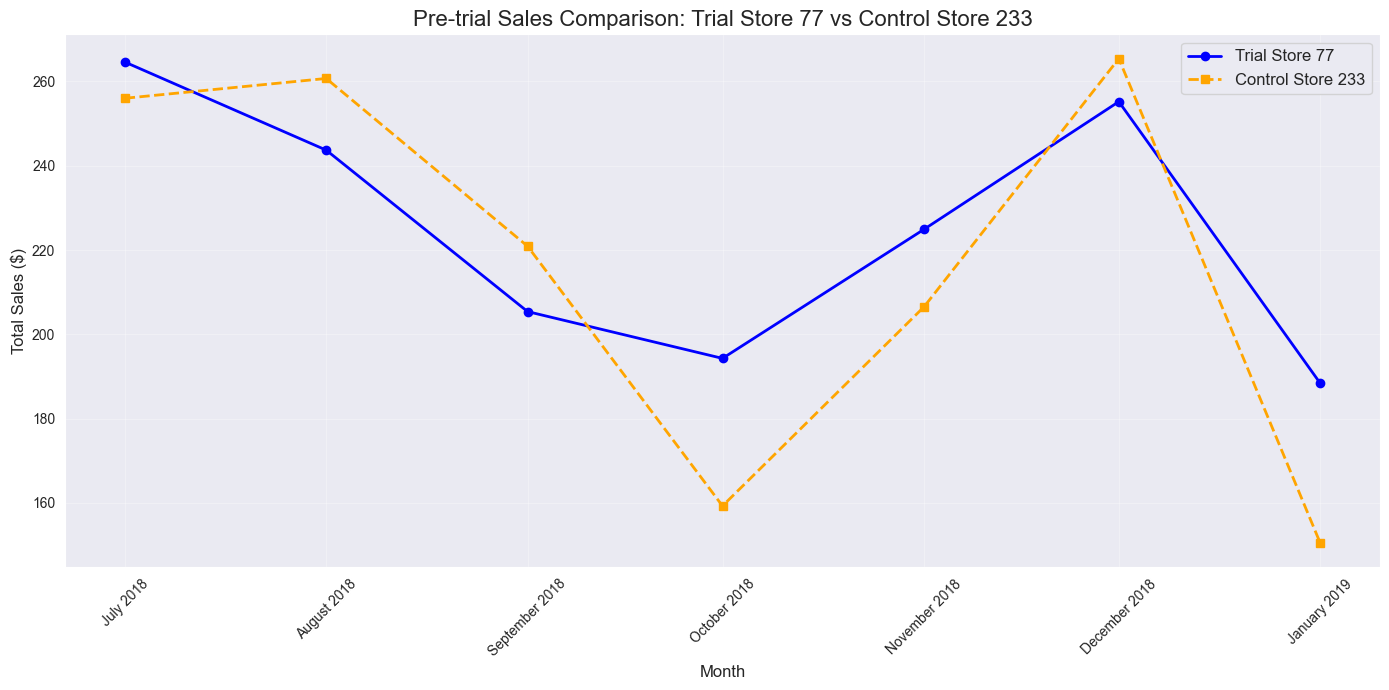

In [21]:
# Make a copy of the pre-trial data for plotting
pretrial_trial_77_copy = pretrial_trial_77.copy()
pretrial_control_77_copy = pretrial_control_77.copy()

# Convert MONTH_YEAR to datetime for plotting
pretrial_trial_77_copy['MONTH_YEAR'] = pd.to_datetime(pretrial_trial_77_copy['MONTH_YEAR'] + '-01')
pretrial_control_77_copy['MONTH_YEAR'] = pd.to_datetime(pretrial_control_77_copy['MONTH_YEAR'] + '-01')

# Plot the pre-trial sales comparison for store 77
plt.figure(figsize=(14, 7))

# Plot pre-trial sales for trial store 77
plt.plot(pretrial_trial_77_copy['MONTH_YEAR'], pretrial_trial_77_copy['monthly_sales_revenue'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_77}')

# Plot pre-trial sales for control store 77
plt.plot(pretrial_control_77_copy['MONTH_YEAR'], pretrial_control_77_copy['monthly_sales_revenue'], 
         marker='s', linestyle='--', color='orange', linewidth=2, label=f'Control Store {control_store_77}')

# Customize the plot
plt.title(f'Pre-trial Sales Comparison: Trial Store {trial_store_77} vs Control Store {control_store_77}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks as dates and show all month names
plt.xticks(pretrial_trial_77_copy['MONTH_YEAR'], pretrial_trial_77_copy['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

plt.savefig('visualizations/pretrial_sales_comparison_store_77.png')

# Show the plot
plt.show()



In [22]:

# Calculate average sales for pre-trial period
avg_trial_sales_77 = pretrial_trial_77['monthly_sales_revenue'].mean()
avg_control_sales_77 = pretrial_control_77['monthly_sales_revenue'].mean()

# Calculate scaling factor
scaling_factor_77 = avg_trial_sales_77 / avg_control_sales_77

print(f"Trial Store: {trial_store_77}")
print(f"Control Store: {control_store_77}")
print(f"Pre-trial Average Sales - Trial: ${avg_trial_sales_77:.2f}")
print(f"Pre-trial Average Sales - Control: ${avg_control_sales_77:.2f}")
print(f"Scaling Factor: {scaling_factor_77:.4f}")


Trial Store: 77
Control Store: 233
Pre-trial Average Sales - Trial: $225.21
Pre-trial Average Sales - Control: $217.04
Scaling Factor: 1.0376


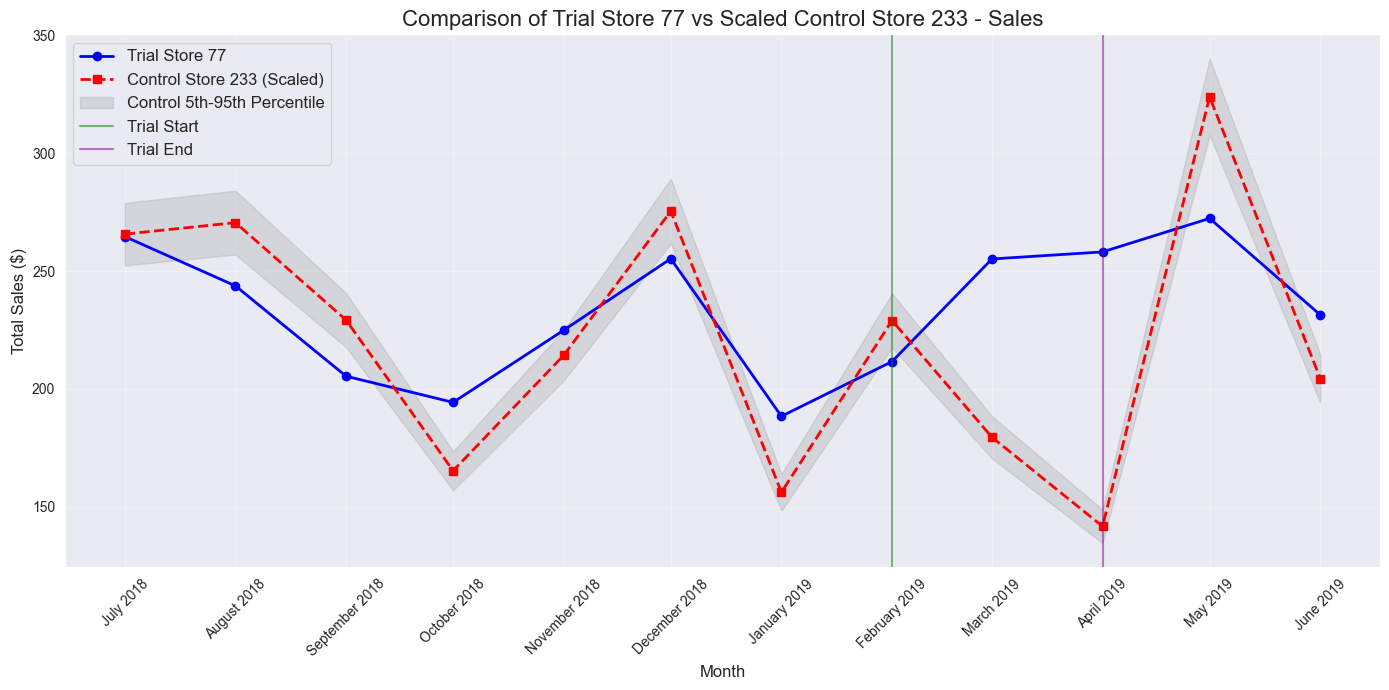

In [23]:
# %%
# Create scaled control data for sales
sales_control_data_scaled_77 = control_data_77.copy()
sales_control_data_scaled_77['scaled_sales'] = control_data_77['monthly_sales_revenue'] * scaling_factor_77

# Calculate 5th and 95th percentiles for scaled control sales
sales_control_data_scaled_77['5th_percentile'] = control_data_77['monthly_sales_revenue'] * scaling_factor_77 * 0.95
sales_control_data_scaled_77['95th_percentile'] = control_data_77['monthly_sales_revenue'] * scaling_factor_77 * 1.05

# Merge trial and scaled control data to create a comparison DataFrame
sales_comparison_data_77 = pd.merge(
    trial_data_77[['MONTH_YEAR', 'monthly_sales_revenue']], 
    sales_control_data_scaled_77[['MONTH_YEAR', 'scaled_sales', '5th_percentile', '95th_percentile']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
sales_comparison_data_77['MONTH_YEAR'] = pd.to_datetime(sales_comparison_data_77['MONTH_YEAR'] + '-01')

# Plot the comparison between trial store and scaled control store
plt.figure(figsize=(14, 7))

# Plot actual trial sales
plt.plot(sales_comparison_data_77['MONTH_YEAR'], sales_comparison_data_77['monthly_sales_revenue'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_77}')

# Plot scaled control sales
plt.plot(sales_comparison_data_77['MONTH_YEAR'], sales_comparison_data_77['scaled_sales'], 
         marker='s', linestyle='--', color='red', linewidth=2, label=f'Control Store {control_store_77} (Scaled)')

# Plot confidence interval for scaled control sales
plt.fill_between(sales_comparison_data_77['MONTH_YEAR'], 
                 sales_comparison_data_77['5th_percentile'], 
                 sales_comparison_data_77['95th_percentile'], 
                 color='gray', alpha=0.2, label='Control 5th-95th Percentile')

# Add vertical line to indicate start of trial period
plt.axvline(x=pd.to_datetime('2019-02-01'), color='green', linestyle='-', alpha=0.5, label='Trial Start')

# Add vertical line to indicate end of trial period
plt.axvline(x=pd.to_datetime('2019-04-01'), color='purple', linestyle='-', alpha=0.5, label='Trial End')

# Customize the plot
plt.title(f'Comparison of Trial Store {trial_store_77} vs Scaled Control Store {control_store_77} - Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks as dates and show all month names
plt.xticks(sales_comparison_data_77['MONTH_YEAR'], sales_comparison_data_77['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('visualizations/trial_vs_scaled_control_sales.png')
plt.show()

In [24]:
# Calculate the percentage difference between trial and scaled control during trial period
trial_period_data_77 = sales_comparison_data_77[
    sales_comparison_data_77['MONTH_YEAR'].between(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'))
]

# Calculate the percentage difference for each month in the trial period
trial_period_data_77['percentage_diff'] = ((trial_period_data_77['monthly_sales_revenue'] - 
                                        trial_period_data_77['scaled_sales']) / 
                                        trial_period_data_77['scaled_sales'] * 100)

# Display the results
trial_period_data_77['MONTH'] = trial_period_data_77['MONTH_YEAR'].dt.strftime('%Y-%m')
trial_impact_77 = trial_period_data_77[['MONTH', 'monthly_sales_revenue', 'scaled_sales', 'percentage_diff']]
trial_impact_77.columns = ['Month', 'Trial Sales', 'Scaled Control Sales', 'Percentage Difference (%)']
display(trial_impact_77)

# Calculate average uplift during the trial period
avg_percentage_diff_77 = trial_period_data_77['percentage_diff'].mean()
print(f"Average percentage uplift during trial period: {avg_percentage_diff_77:.2f}%")

# Calculate total sales difference during trial period
total_trial_sales_77 = trial_period_data_77['monthly_sales_revenue'].sum()
total_scaled_control_sales_77 = trial_period_data_77['scaled_sales'].sum()
total_diff_77 = total_trial_sales_77 - total_scaled_control_sales_77
total_percentage_diff_77 = (total_diff_77 / total_scaled_control_sales_77) * 100

print(f"Total sales during trial period - Trial Store: ${total_trial_sales_77:.2f}")
print(f"Total sales during trial period - Scaled Control: ${total_scaled_control_sales_77:.2f}")
print(f"Total sales difference: ${total_diff_77:.2f} ({total_percentage_diff_77:.2f}%)")


,Month,Trial Sales,Scaled Control Sales,Percentage Difference (%)
7,2019-02,211.6,229.009116,-7.601931
8,2019-03,255.1,179.513263,42.106492
9,2019-04,258.1,141.742842,82.090324


Average percentage uplift during trial period: 38.86%
Total sales during trial period - Trial Store: $724.80
Total sales during trial period - Scaled Control: $550.27
Total sales difference: $174.53 (31.72%)


### Customers of 77

In [25]:
# Now let's do the same analysis for customer counts specific to store 77
# For store 77 trial evaluation, we'll use the best match control store from customers_ctrl_77
customer_control_store_77 = customers_ctrl_77[0]  # Best match for customer counts

# Filter data for the trial and control stores specific to store 77
trial_customer_data_77 = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store_77]
control_customer_data_77 = monthly_metrics[monthly_metrics['STORE_NBR'] == customer_control_store_77]

# Calculate the scaling factor based on pre-trial period for store 77
pretrial_trial_customers_77 = trial_customer_data_77[trial_customer_data_77['MONTH_YEAR'].between('2018-07', '2019-01')]
pretrial_control_customers_77 = control_customer_data_77[control_customer_data_77['MONTH_YEAR'].between('2018-07', '2019-01')]


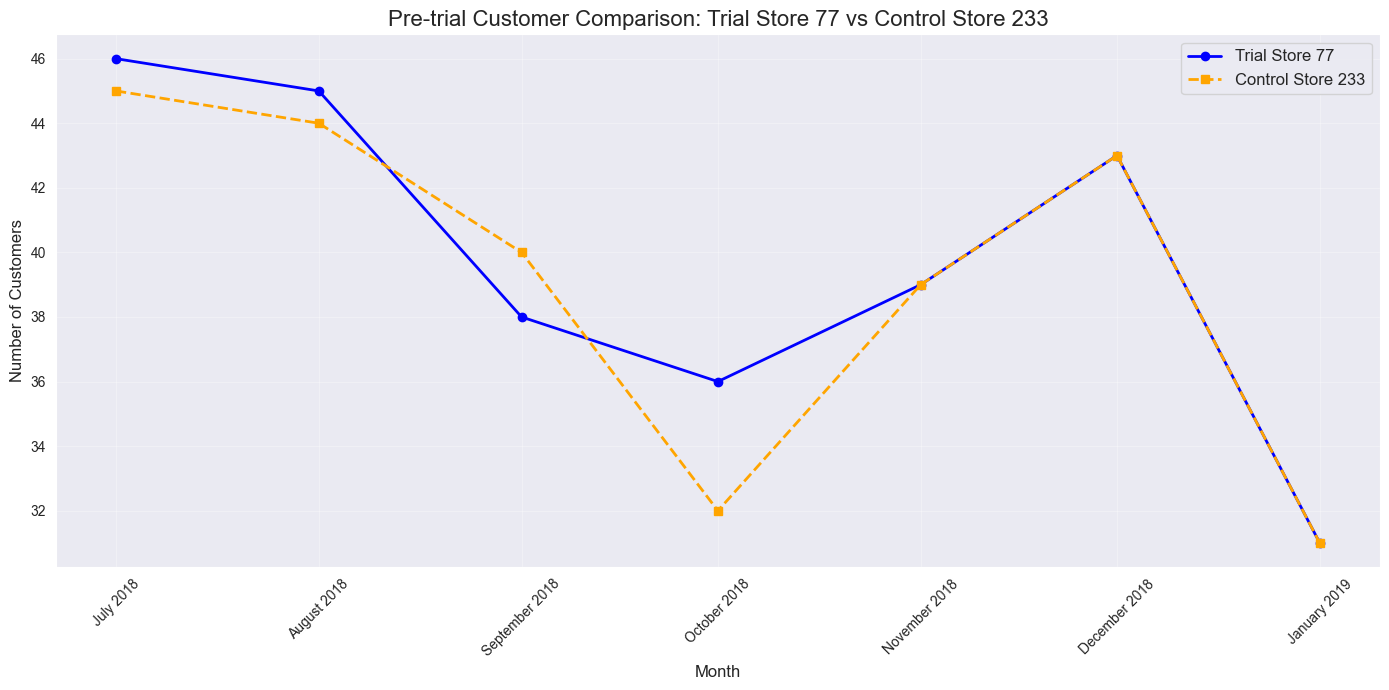

In [26]:
# Make a copy of the pre-trial data for plotting
pretrial_trial_customers_77_copy = pretrial_trial_customers_77.copy()
pretrial_control_customers_77_copy = pretrial_control_customers_77.copy()

# Convert MONTH_YEAR to datetime for plotting
pretrial_trial_customers_77_copy['MONTH_YEAR'] = pd.to_datetime(pretrial_trial_customers_77_copy['MONTH_YEAR'] + '-01')
pretrial_control_customers_77_copy['MONTH_YEAR'] = pd.to_datetime(pretrial_control_customers_77_copy['MONTH_YEAR'] + '-01')

# Plot the pre-trial customer comparison for store 77
plt.figure(figsize=(14, 7))

# Plot pre-trial customers for trial store 77
plt.plot(pretrial_trial_customers_77_copy['MONTH_YEAR'], pretrial_trial_customers_77_copy['number_of_customers'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_77}')

# Plot pre-trial customers for control store 77
plt.plot(pretrial_control_customers_77_copy['MONTH_YEAR'], pretrial_control_customers_77_copy['number_of_customers'], 
         marker='s', linestyle='--', color='orange', linewidth=2, label=f'Control Store {customer_control_store_77}')

# Customize the plot
plt.title(f'Pre-trial Customer Comparison: Trial Store {trial_store_77} vs Control Store {customer_control_store_77}', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks as dates and show all month names
plt.xticks(pretrial_trial_customers_77_copy['MONTH_YEAR'], pretrial_trial_customers_77_copy['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

plt.savefig('visualizations/pretrial_customer_comparison_store_77.png')

# Show the plot
plt.show()


In [27]:

# Calculate average customer counts for pre-trial period specific to store 77
avg_trial_customers_77 = pretrial_trial_customers_77['number_of_customers'].mean()
avg_control_customers_77 = pretrial_control_customers_77['number_of_customers'].mean()

# Calculate scaling factor for customers specific to store 77
customer_scaling_factor_77 = avg_trial_customers_77 / avg_control_customers_77

print(f"Trial Store 77: {trial_store_77}")
print(f"Control Store for Customer Analysis 77: {customer_control_store_77}")
print(f"Pre-trial Average Customers - Trial 77: {avg_trial_customers_77:.2f}")
print(f"Pre-trial Average Customers - Control 77: {avg_control_customers_77:.2f}")
print(f"Customer Scaling Factor 77: {customer_scaling_factor_77:.4f}")


Trial Store 77: 77
Control Store for Customer Analysis 77: 233
Pre-trial Average Customers - Trial 77: 39.71
Pre-trial Average Customers - Control 77: 39.14
Customer Scaling Factor 77: 1.0146


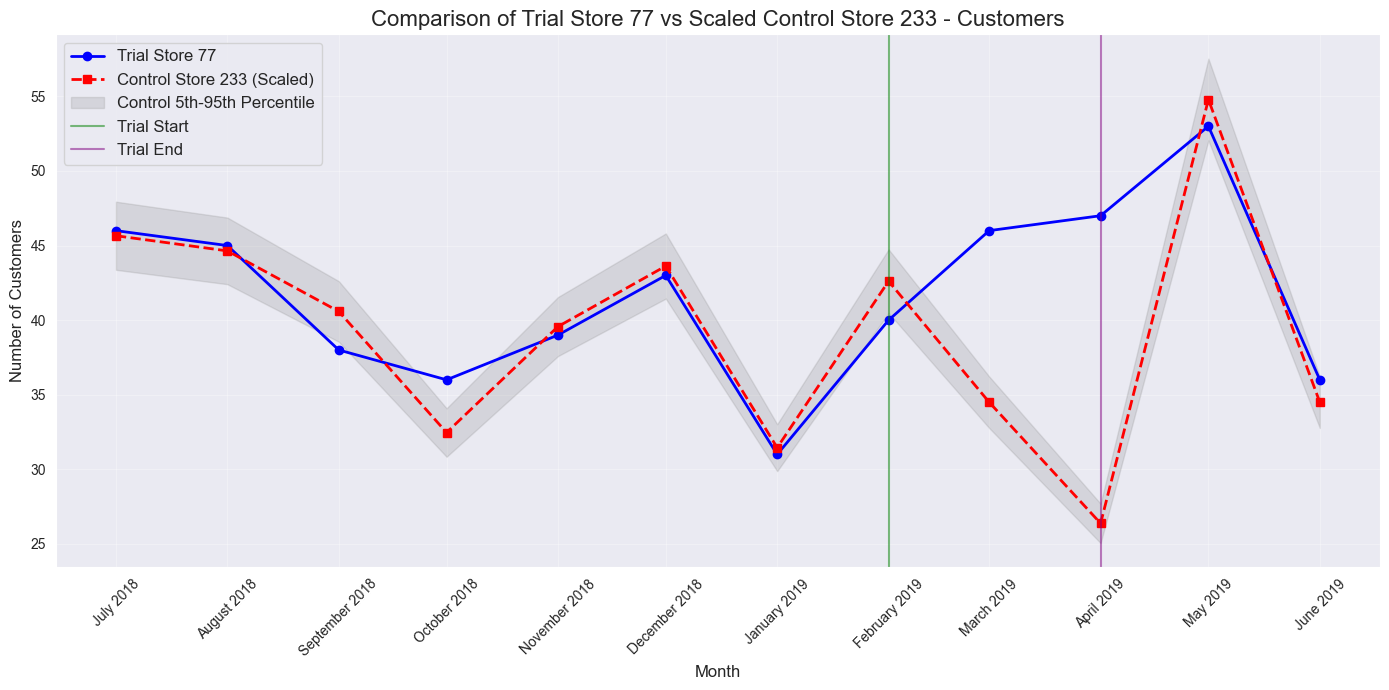

,Month,Trial Customers,Scaled Control Customers,Percentage Difference (%)
7,2019-02,40,42.613139,-6.132237
8,2019-03,46,34.496350,33.347440
9,2019-04,47,26.379562,78.168235


Average percentage customer uplift during trial period for store 77: 35.13%
Total customers during trial period - Trial Store 77: 133
Total customers during trial period - Scaled Control 77: 103
Total customer difference for store 77: 30 (28.52%)


In [42]:

# Create scaled control data for customers specific to store 77
control_customer_data_scaled_77 = control_customer_data_77.copy()
control_customer_data_scaled_77['scaled_customers'] = control_customer_data_77['number_of_customers'] * customer_scaling_factor_77

# Calculate 5th and 95th percentiles for scaled control customers
control_customer_data_scaled_77['5th_percentile'] = control_customer_data_77['number_of_customers'] * customer_scaling_factor_77 * 0.95
control_customer_data_scaled_77['95th_percentile'] = control_customer_data_77['number_of_customers'] * customer_scaling_factor_77 * 1.05

# Merge trial and scaled control data to create a comparison DataFrame for customers specific to store 77
customer_comparison_data_77 = pd.merge(
    trial_customer_data_77[['MONTH_YEAR', 'number_of_customers']], 
    control_customer_data_scaled_77[['MONTH_YEAR', 'scaled_customers', '5th_percentile', '95th_percentile']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
customer_comparison_data_77['MONTH_YEAR'] = pd.to_datetime(customer_comparison_data_77['MONTH_YEAR'] + '-01')
# Plot the comparison between trial store 77 and scaled control store for customers
plt.figure(figsize=(14, 7))

# Plot actual trial customers for store 77
plt.plot(customer_comparison_data_77['MONTH_YEAR'], customer_comparison_data_77['number_of_customers'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store 77')

# Plot scaled control customers for store 77
plt.plot(customer_comparison_data_77['MONTH_YEAR'], customer_comparison_data_77['scaled_customers'], 
         marker='s', linestyle='--', color='red', linewidth=2, label=f'Control Store {customer_control_store_77} (Scaled)')

# Plot confidence interval for scaled control customers
plt.fill_between(customer_comparison_data_77['MONTH_YEAR'], 
                 customer_comparison_data_77['5th_percentile'], 
                 customer_comparison_data_77['95th_percentile'], 
                 color='gray', alpha=0.2, label='Control 5th-95th Percentile')

# Add vertical line to indicate start of trial period
plt.axvline(x=pd.to_datetime('2019-02-01'), color='green', linestyle='-', alpha=0.5, label='Trial Start')

# Add vertical line to indicate end of trial period
plt.axvline(x=pd.to_datetime('2019-04-01'), color='purple', linestyle='-', alpha=0.5, label='Trial End')

# Customize the plot
plt.title(f'Comparison of Trial Store 77 vs Scaled Control Store {customer_control_store_77} - Customers', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks to show month names
plt.xticks(customer_comparison_data_77['MONTH_YEAR'], customer_comparison_data_77['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('visualizations/trial_vs_scaled_control_customers_77.png')
plt.show()

# Calculate the percentage difference between trial and scaled control during trial period for store 77
trial_period_customer_data_77 = customer_comparison_data_77[customer_comparison_data_77['MONTH_YEAR'].between(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'))]

# Calculate the percentage difference for each month in the trial period for store 77
trial_period_customer_data_77['percentage_diff'] = ((trial_period_customer_data_77['number_of_customers'] - 
                                                     trial_period_customer_data_77['scaled_customers']) / 
                                                     trial_period_customer_data_77['scaled_customers'] * 100)

# Display the results for store 77
trial_period_customer_data_77['MONTH'] = trial_period_customer_data_77['MONTH_YEAR'].dt.strftime('%Y-%m')
customer_trial_impact_77 = trial_period_customer_data_77[['MONTH', 'number_of_customers', 'scaled_customers', 'percentage_diff']]
customer_trial_impact_77.columns = ['Month', 'Trial Customers', 'Scaled Control Customers', 'Percentage Difference (%)']
display(customer_trial_impact_77)

# Calculate average uplift during the trial period for store 77
avg_customer_percentage_diff_77 = trial_period_customer_data_77['percentage_diff'].mean()
print(f"Average percentage customer uplift during trial period for store 77: {avg_customer_percentage_diff_77:.2f}%")

# Calculate total customer difference during trial period for store 77
total_trial_customers_77 = trial_period_customer_data_77['number_of_customers'].sum()
total_scaled_control_customers_77 = trial_period_customer_data_77['scaled_customers'].sum()
total_customer_diff_77 = total_trial_customers_77 - total_scaled_control_customers_77
total_customer_percentage_diff_77 = (total_customer_diff_77 / total_scaled_control_customers_77) * 100

print(f"Total customers during trial period - Trial Store 77: {total_trial_customers_77:.0f}")
print(f"Total customers during trial period - Scaled Control 77: {total_scaled_control_customers_77:.0f}")
print(f"Total customer difference for store 77: {total_customer_diff_77:.0f} ({total_customer_percentage_diff_77:.2f}%)")


# 86

### Sales of 86

In [29]:
# Repeat the same analysis for trial store 86
trial_store_86 = 86
control_store_86 = sales_ctrl_86[0]  # Best match for sales

# Filter data for the trial and control stores
trial_data_86 = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store_86]
control_data_86 = monthly_metrics[monthly_metrics['STORE_NBR'] == control_store_86]

# Calculate the scaling factor based on pre-trial period
pretrial_trial_86 = trial_data_86[trial_data_86['MONTH_YEAR'].between('2018-07', '2019-01')]
pretrial_control_86 = control_data_86[control_data_86['MONTH_YEAR'].between('2018-07', '2019-01')]

# Calculate average sales for pre-trial period
avg_trial_sales_86 = pretrial_trial_86['monthly_sales_revenue'].mean()
avg_control_sales_86 = pretrial_control_86['monthly_sales_revenue'].mean()

# Calculate scaling factor
scaling_factor_86 = avg_trial_sales_86 / avg_control_sales_86

print(f"Trial Store: {trial_store_86}")
print(f"Control Store: {control_store_86}")
print(f"Pre-trial Average Sales - Trial: ${avg_trial_sales_86:.2f}")
print(f"Pre-trial Average Sales - Control: ${avg_control_sales_86:.2f}")
print(f"Scaling Factor: {scaling_factor_86:.4f}")



Trial Store: 86
Control Store: 155
Pre-trial Average Sales - Trial: $824.15
Pre-trial Average Sales - Control: $843.07
Scaling Factor: 0.9776


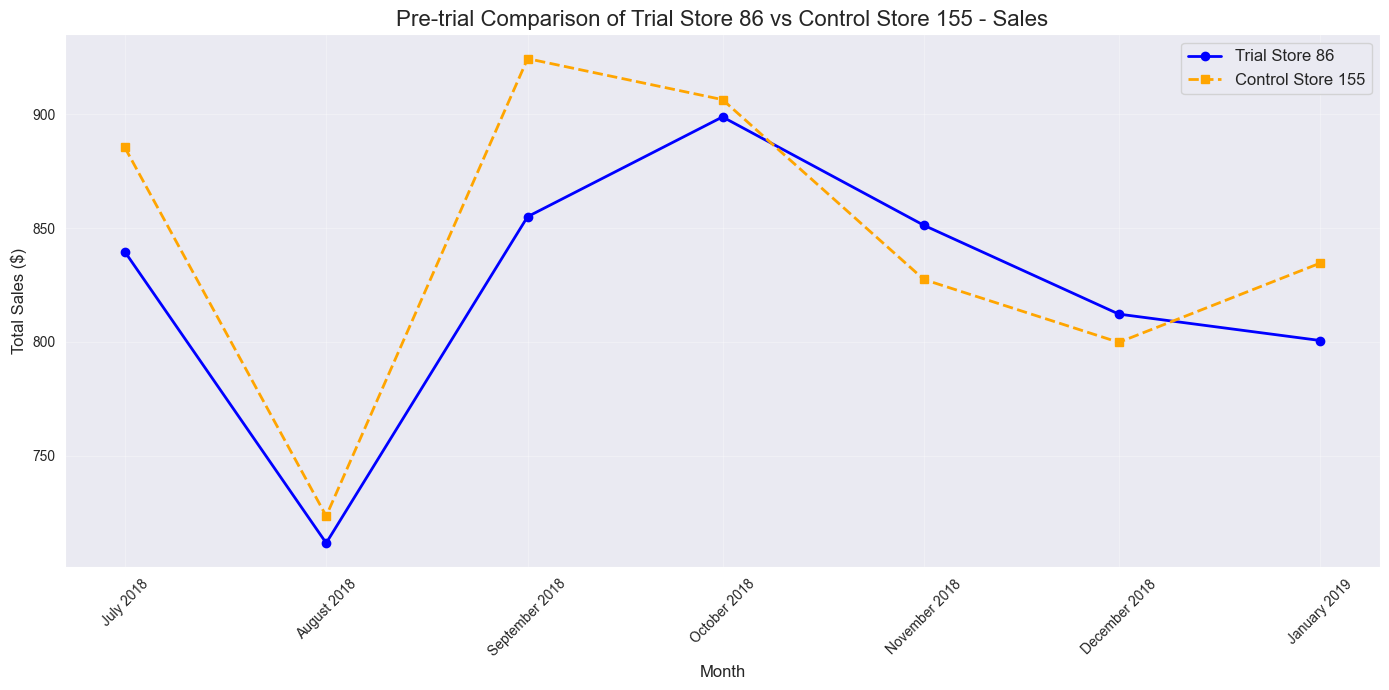

In [30]:


# Plot the pre-trial unscaled sales comparison for store 86

# Filter pre-trial data for plotting
pretrial_sales_comparison_data_86 = pd.merge(
    pretrial_trial_86[['MONTH_YEAR', 'monthly_sales_revenue']], 
    pretrial_control_86[['MONTH_YEAR', 'monthly_sales_revenue']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
pretrial_sales_comparison_data_86['MONTH_YEAR'] = pd.to_datetime(pretrial_sales_comparison_data_86['MONTH_YEAR'] + '-01')

# Plot the pre-trial comparison between trial store and control store
plt.figure(figsize=(14, 7))

# Plot actual trial sales
plt.plot(pretrial_sales_comparison_data_86['MONTH_YEAR'], pretrial_sales_comparison_data_86['monthly_sales_revenue_trial'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_86}')

# Plot actual control sales
plt.plot(pretrial_sales_comparison_data_86['MONTH_YEAR'], pretrial_sales_comparison_data_86['monthly_sales_revenue_control'], 
         marker='s', linestyle='--', color='orange', linewidth=2, label=f'Control Store {control_store_86}')

# Customize the plot
plt.title(f'Pre-trial Comparison of Trial Store {trial_store_86} vs Control Store {control_store_86} - Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks as dates and show all month names
plt.xticks(pretrial_sales_comparison_data_86['MONTH_YEAR'], pretrial_sales_comparison_data_86['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

plt.savefig('visualizations/pretrial_sales_comparison_store_86.png')

# Show the plot
plt.show()


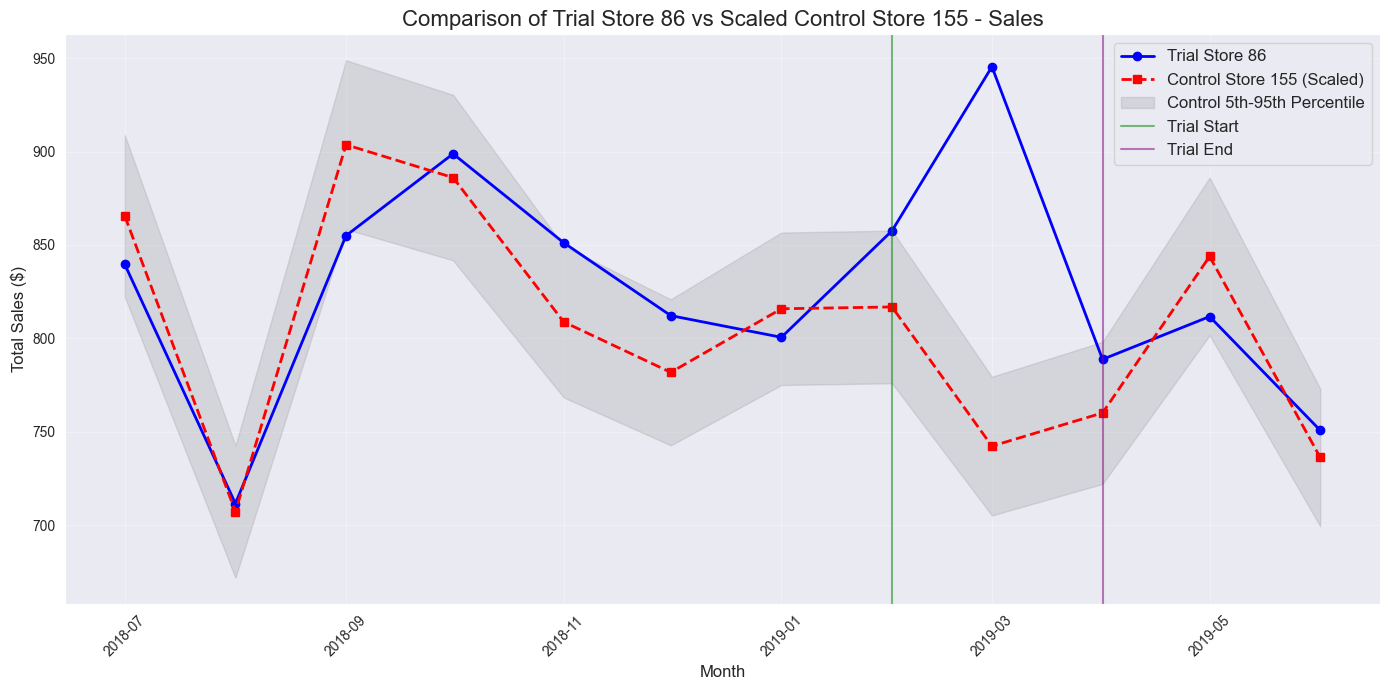

,Month,Trial Sales,Scaled Control Sales,Percentage Difference (%)
7,2019-02,857.6,816.846256,4.989157
8,2019-03,945.4,742.356447,27.351221
9,2019-04,788.8,760.147976,3.769269


Average percentage uplift during trial period: 12.04%
Total sales during trial period - Trial Store 86: $2591.80
Total sales during trial period - Scaled Control: $2319.35
Total sales difference: $272.45 (11.75%)


In [43]:
# Create scaled control data
control_data_86_scaled = control_data_86.copy()
control_data_86_scaled['scaled_sales'] = control_data_86['monthly_sales_revenue'] * scaling_factor_86

# Calculate 5th and 95th percentiles for scaled control sales
control_data_86_scaled['5th_percentile'] = control_data_86['monthly_sales_revenue'] * scaling_factor_86 * 0.95
control_data_86_scaled['95th_percentile'] = control_data_86['monthly_sales_revenue'] * scaling_factor_86 * 1.05

# Merge trial and scaled control data to create a comparison DataFrame
comparison_data_86 = pd.merge(
    trial_data_86[['MONTH_YEAR', 'monthly_sales_revenue']], 
    control_data_86_scaled[['MONTH_YEAR', 'scaled_sales', '5th_percentile', '95th_percentile']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
comparison_data_86['MONTH_YEAR'] = pd.to_datetime(comparison_data_86['MONTH_YEAR'] + '-01')

# Plot the comparison between trial store 86 and scaled control store
plt.figure(figsize=(14, 7))

# Plot actual trial sales
plt.plot(comparison_data_86['MONTH_YEAR'], comparison_data_86['monthly_sales_revenue'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_86}')

# Plot scaled control sales
plt.plot(comparison_data_86['MONTH_YEAR'], comparison_data_86['scaled_sales'], 
         marker='s', linestyle='--', color='red', linewidth=2, label=f'Control Store {control_store_86} (Scaled)')

# Plot confidence interval for scaled control sales
plt.fill_between(comparison_data_86['MONTH_YEAR'], 
                 comparison_data_86['5th_percentile'], 
                 comparison_data_86['95th_percentile'], 
                 color='gray', alpha=0.2, label='Control 5th-95th Percentile')

# Add vertical line to indicate start of trial period
plt.axvline(x=pd.to_datetime('2019-02-01'), color='green', linestyle='-', alpha=0.5, label='Trial Start')

# Add vertical line to indicate end of trial period
plt.axvline(x=pd.to_datetime('2019-04-01'), color='purple', linestyle='-', alpha=0.5, label='Trial End')

# Customize the plot
plt.title(f'Comparison of Trial Store {trial_store_86} vs Scaled Control Store {control_store_86} - Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks as dates
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('visualizations/trial86_vs_scaled_control_sales.png')
plt.show()

# Calculate the percentage difference between trial and scaled control during trial period
trial_period_data_86 = comparison_data_86[comparison_data_86['MONTH_YEAR'].between(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'))]

# Calculate the percentage difference for each month in the trial period
trial_period_data_86['percentage_diff'] = ((trial_period_data_86['monthly_sales_revenue'] - 
                                          trial_period_data_86['scaled_sales']) / 
                                          trial_period_data_86['scaled_sales'] * 100)

# Display the results
trial_period_data_86['MONTH'] = trial_period_data_86['MONTH_YEAR'].dt.strftime('%Y-%m')
trial_impact_86 = trial_period_data_86[['MONTH', 'monthly_sales_revenue', 'scaled_sales', 'percentage_diff']]
trial_impact_86.columns = ['Month', 'Trial Sales', 'Scaled Control Sales', 'Percentage Difference (%)']
display(trial_impact_86)

# Calculate average uplift during the trial period
avg_percentage_diff_86 = trial_period_data_86['percentage_diff'].mean()
print(f"Average percentage uplift during trial period: {avg_percentage_diff_86:.2f}%")

# Calculate total sales difference during trial period
total_trial_sales_86 = trial_period_data_86['monthly_sales_revenue'].sum()
total_scaled_control_sales_86 = trial_period_data_86['scaled_sales'].sum()
total_diff_86 = total_trial_sales_86 - total_scaled_control_sales_86
total_percentage_diff_86 = (total_diff_86 / total_scaled_control_sales_86) * 100

print(f"Total sales during trial period - Trial Store 86: ${total_trial_sales_86:.2f}")
print(f"Total sales during trial period - Scaled Control: ${total_scaled_control_sales_86:.2f}")
print(f"Total sales difference: ${total_diff_86:.2f} ({total_percentage_diff_86:.2f}%)")


### Customers of 86

In [32]:
# Now let's do the same analysis for customer counts
# For store 86 trial evaluation, we'll use the best match control store from customers_ctrl_86
customer_control_store_86 = customers_ctrl_86[0]  # Best match for customer counts

# Filter data for the trial and control stores
trial_customer_data_86 = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store_86]
control_customer_data_86 = monthly_metrics[monthly_metrics['STORE_NBR'] == customer_control_store_86]

# Calculate the scaling factor based on pre-trial period
pretrial_trial_customers_86 = trial_customer_data_86[trial_customer_data_86['MONTH_YEAR'].between('2018-07', '2019-01')]
pretrial_control_customers_86 = control_customer_data_86[control_customer_data_86['MONTH_YEAR'].between('2018-07', '2019-01')]

# Calculate average customer counts for pre-trial period
avg_trial_customers_86 = pretrial_trial_customers_86['number_of_customers'].mean()
avg_control_customers_86 = pretrial_control_customers_86['number_of_customers'].mean()

# Calculate scaling factor for customers
customer_scaling_factor_86 = avg_trial_customers_86 / avg_control_customers_86

print(f"Trial Store: {trial_store_86}")
print(f"Control Store for Customer Analysis: {customer_control_store_86}")
print(f"Pre-trial Average Customers - Trial: {avg_trial_customers_86:.2f}")
print(f"Pre-trial Average Customers - Control: {avg_control_customers_86:.2f}")
print(f"Customer Scaling Factor: {customer_scaling_factor_86:.4f}")

# Create scaled control data for customers
control_customer_data_scaled_86 = control_customer_data_86.copy()
control_customer_data_scaled_86['scaled_customers'] = control_customer_data_86['number_of_customers'] * customer_scaling_factor_86



Trial Store: 86
Control Store for Customer Analysis: 155
Pre-trial Average Customers - Trial: 94.86
Pre-trial Average Customers - Control: 94.43
Customer Scaling Factor: 1.0045


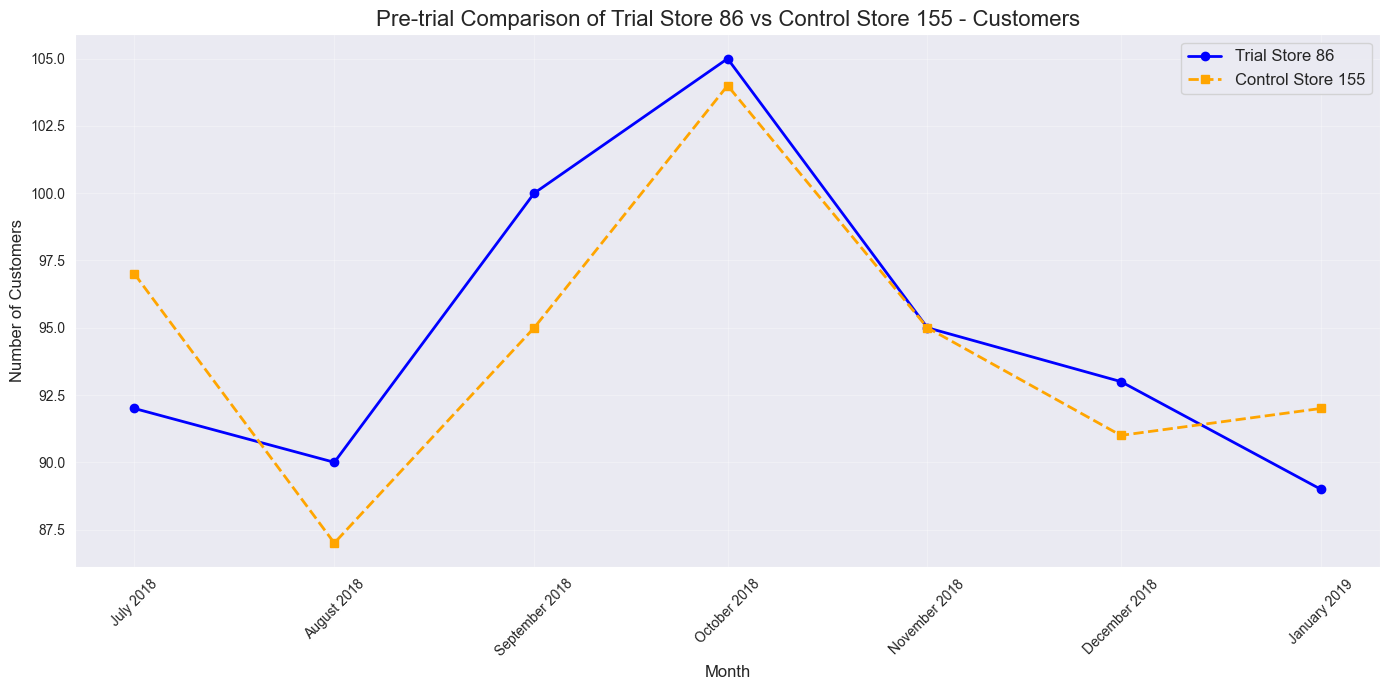

In [33]:
# Plot the pre-trial unscaled customer comparison for store 86

# Filter pre-trial data for plotting
pretrial_customer_comparison_data_86 = pd.merge(
    pretrial_trial_customers_86[['MONTH_YEAR', 'number_of_customers']], 
    pretrial_control_customers_86[['MONTH_YEAR', 'number_of_customers']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
pretrial_customer_comparison_data_86['MONTH_YEAR'] = pd.to_datetime(pretrial_customer_comparison_data_86['MONTH_YEAR'] + '-01')

# Plot the pre-trial comparison between trial store and control store
plt.figure(figsize=(14, 7))

# Plot actual trial customers
plt.plot(pretrial_customer_comparison_data_86['MONTH_YEAR'], pretrial_customer_comparison_data_86['number_of_customers_trial'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_86}')

# Plot actual control customers
plt.plot(pretrial_customer_comparison_data_86['MONTH_YEAR'], pretrial_customer_comparison_data_86['number_of_customers_control'], 
         marker='s', linestyle='--', color='orange', linewidth=2, label=f'Control Store {customer_control_store_86}')

# Customize the plot
plt.title(f'Pre-trial Comparison of Trial Store {trial_store_86} vs Control Store {customer_control_store_86} - Customers', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks as dates and show all month names
plt.xticks(pretrial_customer_comparison_data_86['MONTH_YEAR'], pretrial_customer_comparison_data_86['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

plt.savefig('visualizations/pretrial_customer_comparison_store_86.png')


# Show the plot
plt.show()


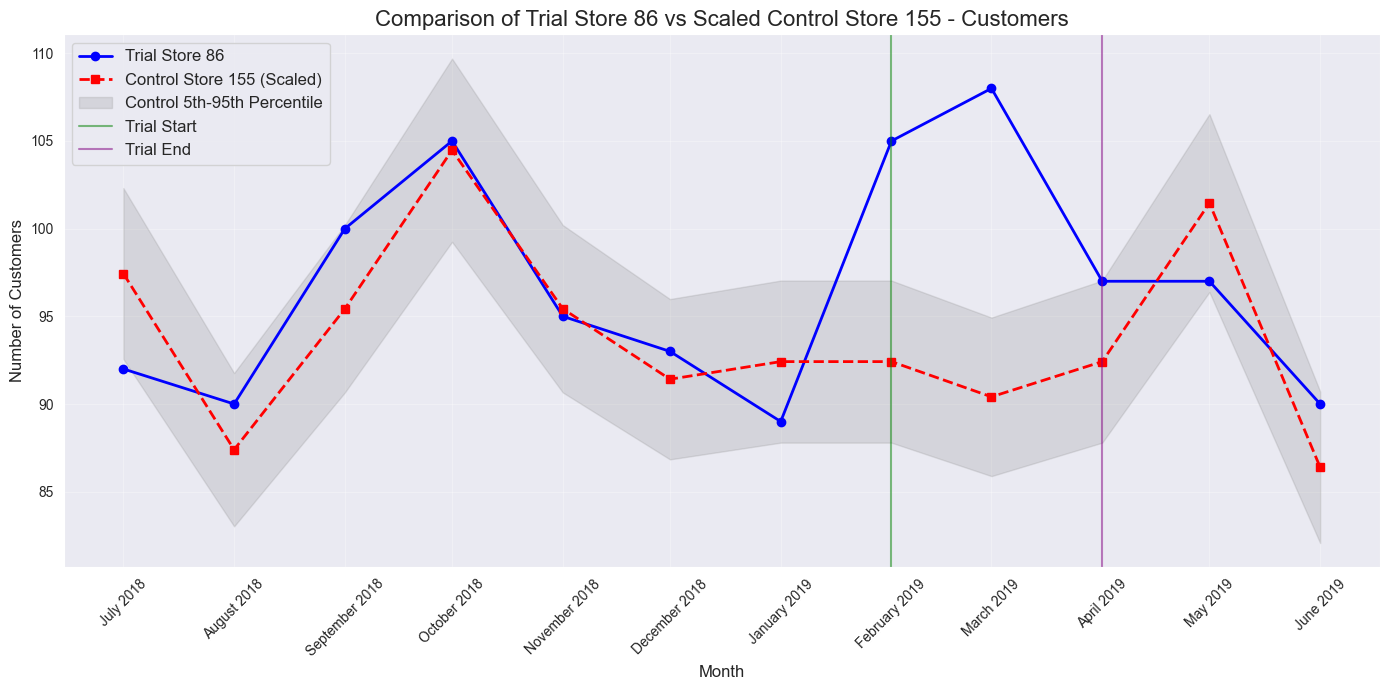

,Month,Trial Customers,Scaled Control Customers,Percentage Difference (%)
7,2019-02,105,92.417549,13.614785
8,2019-03,108,90.408472,19.457831
9,2019-04,97,92.417549,4.958421


Average percentage customer uplift during trial period for store 86: 12.68%
Total customers during trial period - Trial Store 86: 310
Total customers during trial period - Scaled Control 86: 275
Total customer difference for store 86: 35 (12.63%)


In [44]:

# Create scaled control data for customers specific to store 86
control_customer_data_scaled_86 = control_customer_data_86.copy()
control_customer_data_scaled_86['scaled_customers'] = control_customer_data_86['number_of_customers'] * customer_scaling_factor_86

# Calculate 5th and 95th percentiles for scaled control customers
control_customer_data_scaled_86['5th_percentile'] = control_customer_data_86['number_of_customers'] * customer_scaling_factor_86 * 0.95
control_customer_data_scaled_86['95th_percentile'] = control_customer_data_86['number_of_customers'] * customer_scaling_factor_86 * 1.05

# Merge trial and scaled control data to create a comparison DataFrame for customers specific to store 86
customer_comparison_data_86 = pd.merge(
    trial_customer_data_86[['MONTH_YEAR', 'number_of_customers']], 
    control_customer_data_scaled_86[['MONTH_YEAR', 'scaled_customers', '5th_percentile', '95th_percentile']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
customer_comparison_data_86['MONTH_YEAR'] = pd.to_datetime(customer_comparison_data_86['MONTH_YEAR'] + '-01')
# Plot the comparison between trial store 86 and scaled control store for customers
plt.figure(figsize=(14, 7))

# Plot actual trial customers for store 86
plt.plot(customer_comparison_data_86['MONTH_YEAR'], customer_comparison_data_86['number_of_customers'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store 86')

# Plot scaled control customers for store 86
plt.plot(customer_comparison_data_86['MONTH_YEAR'], customer_comparison_data_86['scaled_customers'], 
         marker='s', linestyle='--', color='red', linewidth=2, label=f'Control Store {customer_control_store_86} (Scaled)')

# Plot confidence interval for scaled control customers
plt.fill_between(customer_comparison_data_86['MONTH_YEAR'], 
                 customer_comparison_data_86['5th_percentile'], 
                 customer_comparison_data_86['95th_percentile'], 
                 color='gray', alpha=0.2, label='Control 5th-95th Percentile')

# Add vertical line to indicate start of trial period
plt.axvline(x=pd.to_datetime('2019-02-01'), color='green', linestyle='-', alpha=0.5, label='Trial Start')

# Add vertical line to indicate end of trial period
plt.axvline(x=pd.to_datetime('2019-04-01'), color='purple', linestyle='-', alpha=0.5, label='Trial End')

# Customize the plot
plt.title(f'Comparison of Trial Store 86 vs Scaled Control Store {customer_control_store_86} - Customers', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks to show month names
plt.xticks(customer_comparison_data_86['MONTH_YEAR'], customer_comparison_data_86['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('visualizations/trial_vs_scaled_control_customers_86.png')
plt.show()

# Calculate the percentage difference between trial and scaled control during trial period for store 86
trial_period_customer_data_86 = customer_comparison_data_86[customer_comparison_data_86['MONTH_YEAR'].between(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'))]

# Calculate the percentage difference for each month in the trial period for store 86
trial_period_customer_data_86['percentage_diff'] = ((trial_period_customer_data_86['number_of_customers'] - 
                                                     trial_period_customer_data_86['scaled_customers']) / 
                                                     trial_period_customer_data_86['scaled_customers'] * 100)

# Display the results for store 86
trial_period_customer_data_86['MONTH'] = trial_period_customer_data_86['MONTH_YEAR'].dt.strftime('%Y-%m')
customer_trial_impact_86 = trial_period_customer_data_86[['MONTH', 'number_of_customers', 'scaled_customers', 'percentage_diff']]
customer_trial_impact_86.columns = ['Month', 'Trial Customers', 'Scaled Control Customers', 'Percentage Difference (%)']
display(customer_trial_impact_86)

# Calculate average uplift during the trial period for store 86
avg_customer_percentage_diff_86 = trial_period_customer_data_86['percentage_diff'].mean()
print(f"Average percentage customer uplift during trial period for store 86: {avg_customer_percentage_diff_86:.2f}%")

# Calculate total customer difference during trial period for store 86
total_trial_customers_86 = trial_period_customer_data_86['number_of_customers'].sum()
total_scaled_control_customers_86 = trial_period_customer_data_86['scaled_customers'].sum()
total_customer_diff_86 = total_trial_customers_86 - total_scaled_control_customers_86
total_customer_percentage_diff_86 = (total_customer_diff_86 / total_scaled_control_customers_86) * 100

print(f"Total customers during trial period - Trial Store 86: {total_trial_customers_86:.0f}")
print(f"Total customers during trial period - Scaled Control 86: {total_scaled_control_customers_86:.0f}")
print(f"Total customer difference for store 86: {total_customer_diff_86:.0f} ({total_customer_percentage_diff_86:.2f}%)")


# 88

### Sales of 88

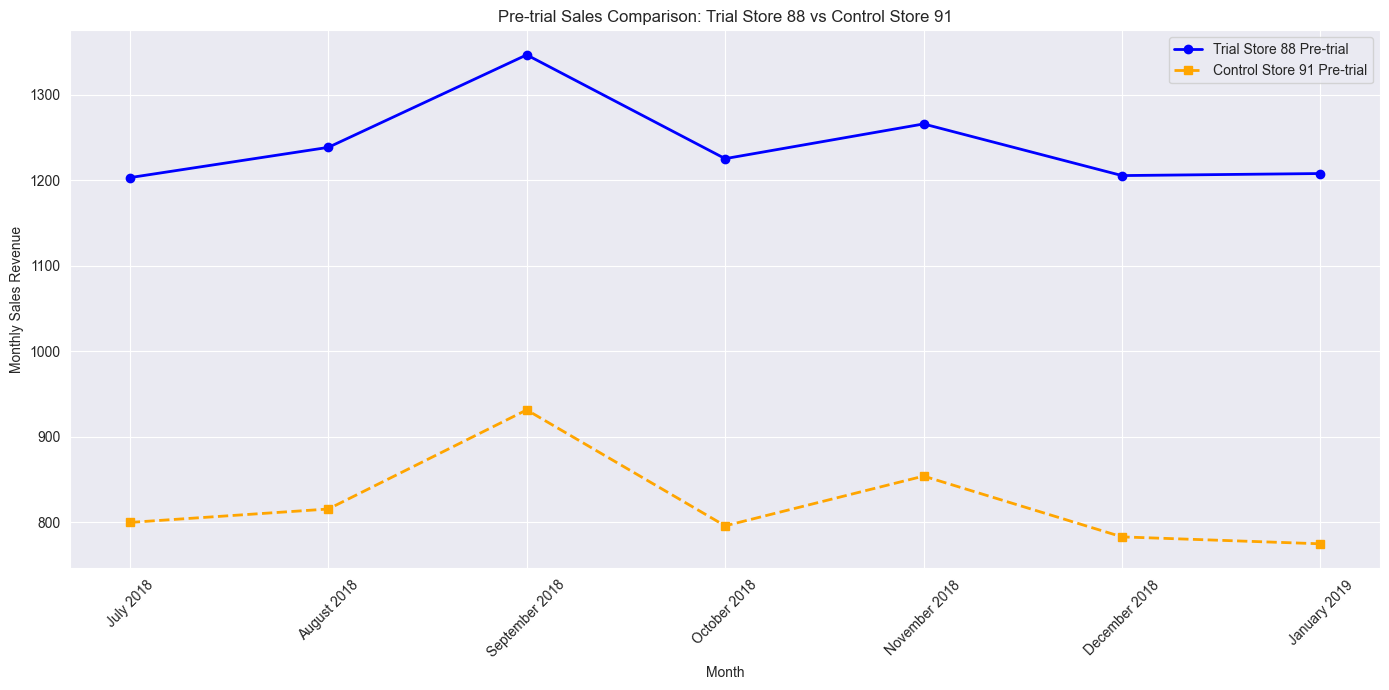

In [35]:
# Repeat the same analysis for trial store 88
trial_store_88 = 88
control_store_88 = sales_ctrl_88[0]  # Best match for sales

# Filter data for the trial and control stores
trial_data_88 = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store_88]
control_data_88 = monthly_metrics[monthly_metrics['STORE_NBR'] == control_store_88]

# Calculate the scaling factor based on pre-trial period
pretrial_trial_88 = trial_data_88[trial_data_88['MONTH_YEAR'].between('2018-07', '2019-01')]
pretrial_control_88 = control_data_88[control_data_88['MONTH_YEAR'].between('2018-07', '2019-01')]



# Create copies of the pre-trial data for plotting
plt.figure(figsize=(14, 7))

# Convert MONTH_YEAR to datetime to extract month names
pretrial_trial_88['MONTH_YEAR'] = pd.to_datetime(pretrial_trial_88['MONTH_YEAR'] + '-01')
pretrial_control_88['MONTH_YEAR'] = pd.to_datetime(pretrial_control_88['MONTH_YEAR'] + '-01')

# Plot pre-trial sales for trial store 88
plt.plot(pretrial_trial_88['MONTH_YEAR'].dt.strftime('%B %Y'), pretrial_trial_88['monthly_sales_revenue'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_88} Pre-trial')

# Plot pre-trial sales for control store 88
plt.plot(pretrial_control_88['MONTH_YEAR'].dt.strftime('%B %Y'), pretrial_control_88['monthly_sales_revenue'], 
         marker='s', linestyle='--', color='orange', linewidth=2, label=f'Control Store {control_store_88} Pre-trial')

# Add labels and title
plt.xlabel('Month')
plt.ylabel('Monthly Sales Revenue')
plt.title('Pre-trial Sales Comparison: Trial Store 88 vs Control Store 91')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('visualizations/pretrial_sales_comparison_store_88.png')

plt.show()


In [36]:

# Calculate average sales for pre-trial period
avg_trial_sales_88 = pretrial_trial_88['monthly_sales_revenue'].mean()
avg_control_sales_88 = pretrial_control_88['monthly_sales_revenue'].mean()

# Calculate scaling factor
scaling_factor_88 = avg_trial_sales_88 / avg_control_sales_88

print(f"Trial Store: {trial_store_88}")
print(f"Control Store: {control_store_88}")
print(f"Pre-trial Average Sales - Trial: ${avg_trial_sales_88:.2f}")
print(f"Pre-trial Average Sales - Control: ${avg_control_sales_88:.2f}")
print(f"Scaling Factor: {scaling_factor_88:.4f}")



Trial Store: 88
Control Store: 91
Pre-trial Average Sales - Trial: $1241.74
Pre-trial Average Sales - Control: $821.93
Scaling Factor: 1.5108


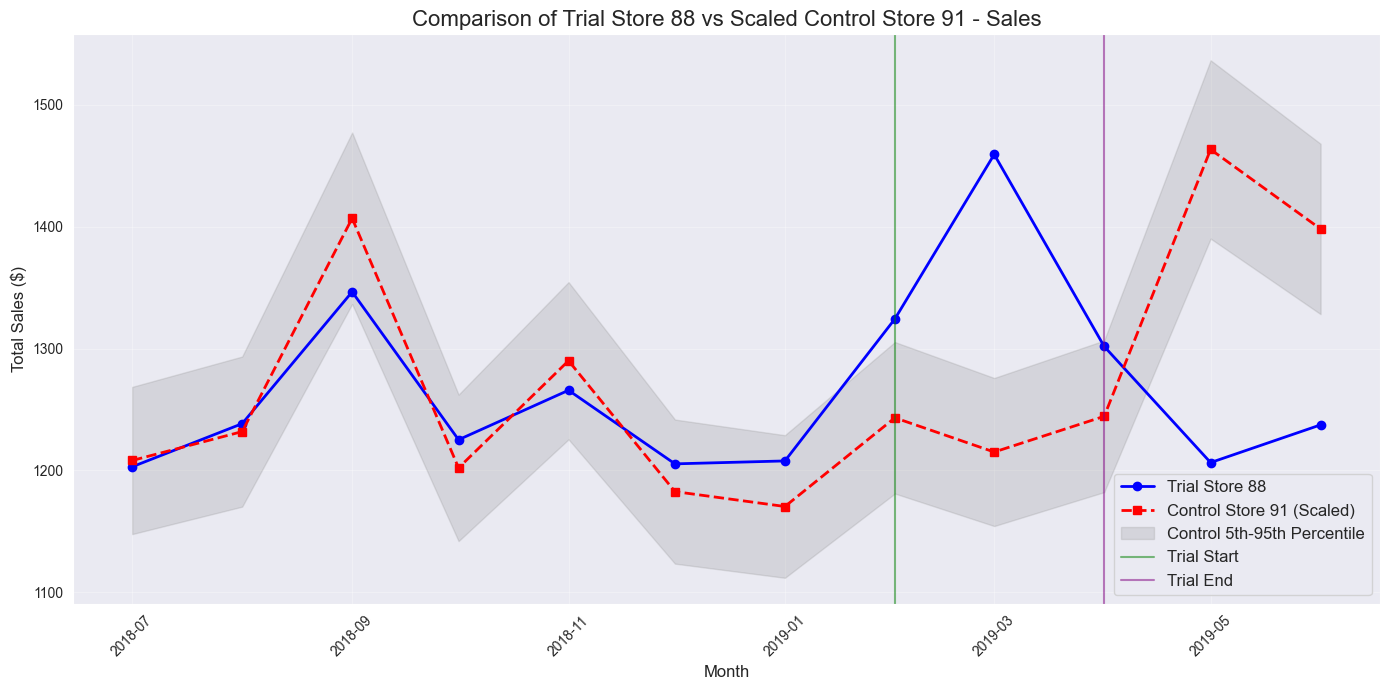

,Month,Trial Sales,Scaled Control Sales,Percentage Difference (%)
7,2019-02,1324.4,1243.210460,6.530635
8,2019-03,1459.4,1215.110187,20.104334
9,2019-04,1301.8,1244.419074,4.611061


Average percentage uplift during trial period: 10.42%
Total sales during trial period - Trial Store 88: $4085.60
Total sales during trial period - Scaled Control: $3702.74
Total sales difference: $382.86 (10.34%)


In [45]:
# Create scaled control data
control_data_88_scaled = control_data_88.copy()
control_data_88_scaled['scaled_sales'] = control_data_88['monthly_sales_revenue'] * scaling_factor_88

# Calculate 5th and 95th percentiles for scaled control sales
control_data_88_scaled['5th_percentile'] = control_data_88['monthly_sales_revenue'] * scaling_factor_88 * 0.95
control_data_88_scaled['95th_percentile'] = control_data_88['monthly_sales_revenue'] * scaling_factor_88 * 1.05

# Merge trial and scaled control data to create a comparison DataFrame
comparison_data_88 = pd.merge(
    trial_data_88[['MONTH_YEAR', 'monthly_sales_revenue']], 
    control_data_88_scaled[['MONTH_YEAR', 'scaled_sales', '5th_percentile', '95th_percentile']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
comparison_data_88['MONTH_YEAR'] = pd.to_datetime(comparison_data_88['MONTH_YEAR'] + '-01')


# Plot the comparison between trial store 88 and scaled control store
plt.figure(figsize=(14, 7))

# Plot actual trial sales
plt.plot(comparison_data_88['MONTH_YEAR'], comparison_data_88['monthly_sales_revenue'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store {trial_store_88}')

# Plot scaled control sales
plt.plot(comparison_data_88['MONTH_YEAR'], comparison_data_88['scaled_sales'], 
         marker='s', linestyle='--', color='red', linewidth=2, label=f'Control Store {control_store_88} (Scaled)')

# Plot confidence interval for scaled control sales
plt.fill_between(comparison_data_88['MONTH_YEAR'], 
                 comparison_data_88['5th_percentile'], 
                 comparison_data_88['95th_percentile'], 
                 color='gray', alpha=0.2, label='Control 5th-95th Percentile')

# Add vertical line to indicate start of trial period
plt.axvline(x=pd.to_datetime('2019-02-01'), color='green', linestyle='-', alpha=0.5, label='Trial Start')

# Add vertical line to indicate end of trial period
plt.axvline(x=pd.to_datetime('2019-04-01'), color='purple', linestyle='-', alpha=0.5, label='Trial End')

# Customize the plot
plt.title(f'Comparison of Trial Store {trial_store_88} vs Scaled Control Store {control_store_88} - Sales', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Sales ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks as dates
plt.xticks(rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('visualizations/trial88_vs_scaled_control_sales.png')
plt.show()

# Calculate the percentage difference between trial and scaled control during trial period
trial_period_data_88 = comparison_data_88[comparison_data_88['MONTH_YEAR'].between(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'))]

# Calculate the percentage difference for each month in the trial period
trial_period_data_88['percentage_diff'] = ((trial_period_data_88['monthly_sales_revenue'] - 
                                          trial_period_data_88['scaled_sales']) / 
                                          trial_period_data_88['scaled_sales'] * 100)

# Display the results
trial_period_data_88['MONTH'] = trial_period_data_88['MONTH_YEAR'].dt.strftime('%Y-%m')
trial_impact_88 = trial_period_data_88[['MONTH', 'monthly_sales_revenue', 'scaled_sales', 'percentage_diff']]
trial_impact_88.columns = ['Month', 'Trial Sales', 'Scaled Control Sales', 'Percentage Difference (%)']
display(trial_impact_88)

# Calculate average uplift during the trial period
avg_percentage_diff_88 = trial_period_data_88['percentage_diff'].mean()
print(f"Average percentage uplift during trial period: {avg_percentage_diff_88:.2f}%")

# Calculate total sales difference during trial period
total_trial_sales_88 = trial_period_data_88['monthly_sales_revenue'].sum()
total_scaled_control_sales_88 = trial_period_data_88['scaled_sales'].sum()
total_diff_88 = total_trial_sales_88 - total_scaled_control_sales_88
total_percentage_diff_88 = (total_diff_88 / total_scaled_control_sales_88) * 100

print(f"Total sales during trial period - Trial Store 88: ${total_trial_sales_88:.2f}")
print(f"Total sales during trial period - Scaled Control: ${total_scaled_control_sales_88:.2f}")
print(f"Total sales difference: ${total_diff_88:.2f} ({total_percentage_diff_88:.2f}%)")


### Customers of 88

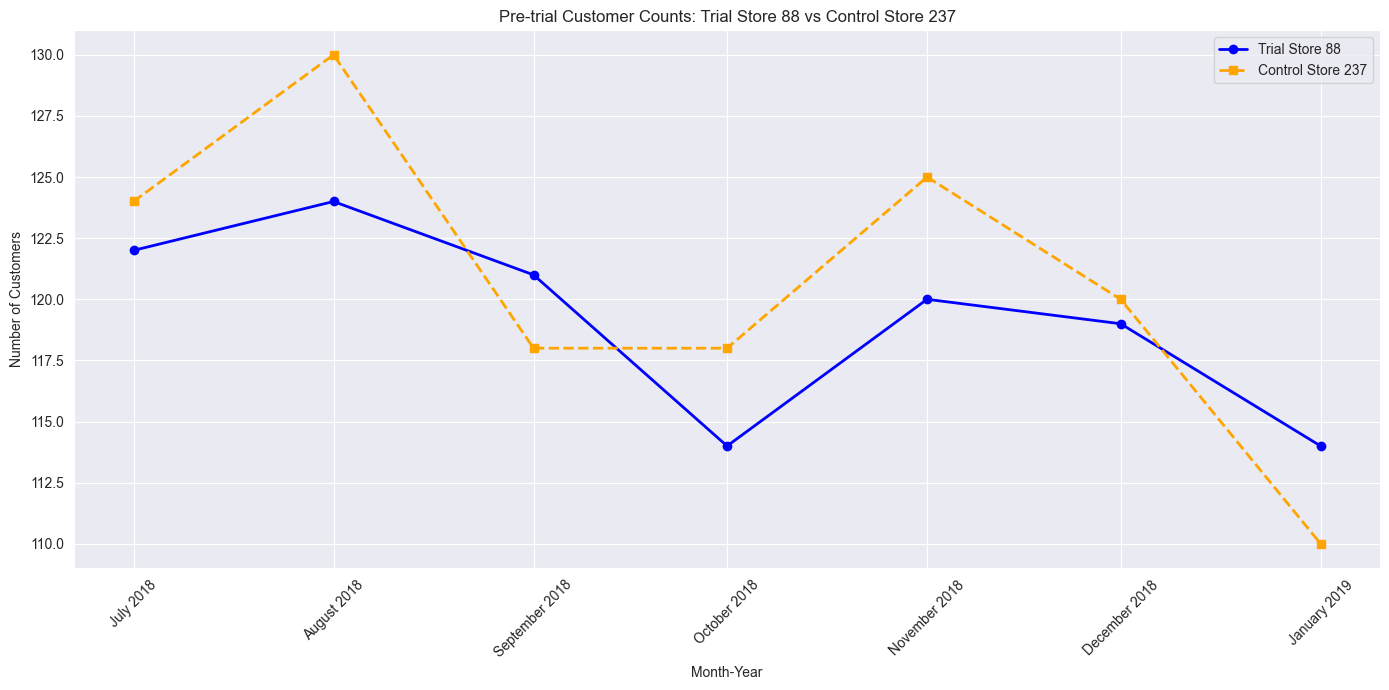

In [38]:
# Now let's do the same analysis for customer counts
# For store 88 trial evaluation, we'll use the best match control store from customers_ctrl_88
customer_control_store_88 = customers_ctrl_88[0]  # Best match for customer counts

# Filter data for the trial and control stores
trial_customer_data_88 = monthly_metrics[monthly_metrics['STORE_NBR'] == trial_store_88]
control_customer_data_88 = monthly_metrics[monthly_metrics['STORE_NBR'] == customer_control_store_88]

# Calculate the scaling factor based on pre-trial period
pretrial_trial_customers_88 = trial_customer_data_88[trial_customer_data_88['MONTH_YEAR'].between('2018-07', '2019-01')]
pretrial_control_customers_88 = control_customer_data_88[control_customer_data_88['MONTH_YEAR'].between('2018-07', '2019-01')]

# Plot the pre-trial customer data for both trial store 88 and control store 88
plt.figure(figsize=(14, 7))

# Convert MONTH_YEAR to datetime for plotting
pretrial_trial_customers_88['MONTH_YEAR'] = pd.to_datetime(pretrial_trial_customers_88['MONTH_YEAR'] + '-01')
pretrial_control_customers_88['MONTH_YEAR'] = pd.to_datetime(pretrial_control_customers_88['MONTH_YEAR'] + '-01')

# Plot pre-trial customers for trial store 88
plt.plot(pretrial_trial_customers_88['MONTH_YEAR'], pretrial_trial_customers_88['number_of_customers'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label='Trial Store 88')

# Plot pre-trial customers for control store 88
plt.plot(pretrial_control_customers_88['MONTH_YEAR'], pretrial_control_customers_88['number_of_customers'], 
         marker='s', linestyle='--', color='orange', linewidth=2, label=f'Control Store {customer_control_store_88}')

# Add labels and title
plt.title('Pre-trial Customer Counts: Trial Store 88 vs Control Store 237')
plt.xlabel('Month-Year')
plt.ylabel('Number of Customers')
plt.xticks(pretrial_trial_customers_88['MONTH_YEAR'], pretrial_trial_customers_88['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.savefig('visualizations/pretrial_customer_comparison_store_88.png')

# Display the plot
plt.show()



In [39]:

# Calculate average customer counts for pre-trial period
avg_trial_customers_88 = pretrial_trial_customers_88['number_of_customers'].mean()
avg_control_customers_88 = pretrial_control_customers_88['number_of_customers'].mean()

# Calculate scaling factor for customers
customer_scaling_factor_88 = avg_trial_customers_88 / avg_control_customers_88

print(f"Trial Store: {trial_store_88}")
print(f"Control Store for Customer Analysis: {customer_control_store_88}")
print(f"Pre-trial Average Customers - Trial: {avg_trial_customers_88:.2f}")
print(f"Pre-trial Average Customers - Control: {avg_control_customers_88:.2f}")
print(f"Customer Scaling Factor: {customer_scaling_factor_88:.4f}")


Trial Store: 88
Control Store for Customer Analysis: 237
Pre-trial Average Customers - Trial: 119.14
Pre-trial Average Customers - Control: 120.71
Customer Scaling Factor: 0.9870


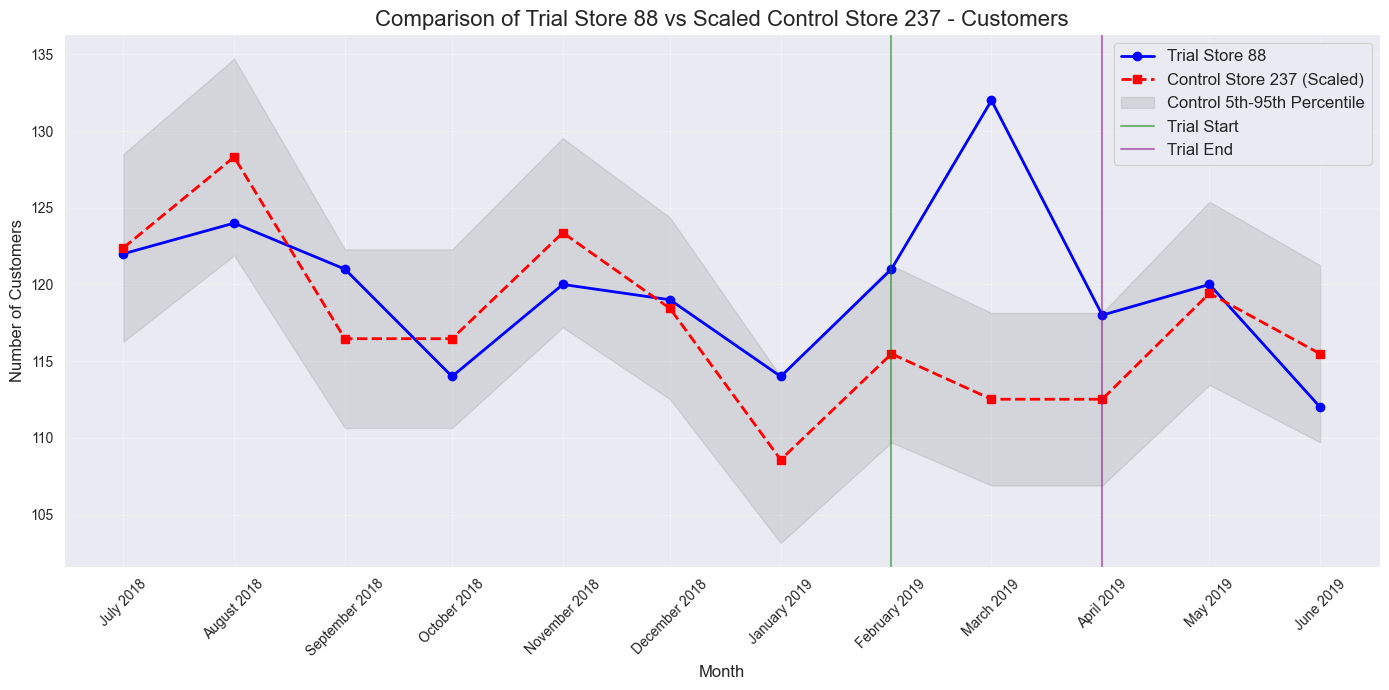

,Month,Trial Customers,Scaled Control Customers,Percentage Difference (%)
7,2019-02,121,115.476923,4.782840
8,2019-03,132,112.515976,17.316673
9,2019-04,118,112.515976,4.873996


Average percentage customer uplift during trial period for store 88: 8.99%
Total customers during trial period - Trial Store 88: 371
Total customers during trial period - Scaled Control 88: 341
Total customer difference for store 88: 30 (8.95%)


In [46]:

# Create scaled control data for customers specific to store 88
control_customer_data_scaled_88 = control_customer_data_88.copy()
control_customer_data_scaled_88['scaled_customers'] = control_customer_data_88['number_of_customers'] * customer_scaling_factor_88

# Calculate 5th and 95th percentiles for scaled control customers
control_customer_data_scaled_88['5th_percentile'] = control_customer_data_88['number_of_customers'] * customer_scaling_factor_88 * 0.95
control_customer_data_scaled_88['95th_percentile'] = control_customer_data_88['number_of_customers'] * customer_scaling_factor_88 * 1.05

# Merge trial and scaled control data to create a comparison DataFrame for customers specific to store 88
customer_comparison_data_88 = pd.merge(
    trial_customer_data_88[['MONTH_YEAR', 'number_of_customers']], 
    control_customer_data_scaled_88[['MONTH_YEAR', 'scaled_customers', '5th_percentile', '95th_percentile']], 
    on='MONTH_YEAR', 
    suffixes=('_trial', '_control')
)

# Convert MONTH_YEAR to datetime for better plotting
customer_comparison_data_88['MONTH_YEAR'] = pd.to_datetime(customer_comparison_data_88['MONTH_YEAR'] + '-01')
# Plot the comparison between trial store 88 and scaled control store for customers
plt.figure(figsize=(14, 7))

# Plot actual trial customers for store 88
plt.plot(customer_comparison_data_88['MONTH_YEAR'], customer_comparison_data_88['number_of_customers'], 
         marker='o', linestyle='-', color='blue', linewidth=2, label=f'Trial Store 88')

# Plot scaled control customers for store 88
plt.plot(customer_comparison_data_88['MONTH_YEAR'], customer_comparison_data_88['scaled_customers'], 
         marker='s', linestyle='--', color='red', linewidth=2, label=f'Control Store {customer_control_store_88} (Scaled)')

# Plot confidence interval for scaled control customers
plt.fill_between(customer_comparison_data_88['MONTH_YEAR'], 
                 customer_comparison_data_88['5th_percentile'], 
                 customer_comparison_data_88['95th_percentile'], 
                 color='gray', alpha=0.2, label='Control 5th-95th Percentile')

# Add vertical line to indicate start of trial period
plt.axvline(x=pd.to_datetime('2019-02-01'), color='green', linestyle='-', alpha=0.5, label='Trial Start')

# Add vertical line to indicate end of trial period
plt.axvline(x=pd.to_datetime('2019-04-01'), color='purple', linestyle='-', alpha=0.5, label='Trial End')

# Customize the plot
plt.title(f'Comparison of Trial Store 88 vs Scaled Control Store {customer_control_store_88} - Customers', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Customers', fontsize=12)
plt.grid(True, alpha=0.3)
plt.legend(fontsize=12)

# Format x-axis ticks to show month names
plt.xticks(customer_comparison_data_88['MONTH_YEAR'], customer_comparison_data_88['MONTH_YEAR'].dt.strftime('%B %Y'), rotation=45)
plt.tight_layout()

# Save the plot
plt.savefig('visualizations/trial_vs_scaled_control_customers_88.png')
plt.show()

# Calculate the percentage difference between trial and scaled control during trial period for store 88
trial_period_customer_data_88 = customer_comparison_data_88[customer_comparison_data_88['MONTH_YEAR'].between(pd.to_datetime('2019-02-01'), pd.to_datetime('2019-04-30'))]

# Calculate the percentage difference for each month in the trial period for store 88
trial_period_customer_data_88['percentage_diff'] = ((trial_period_customer_data_88['number_of_customers'] - 
                                                     trial_period_customer_data_88['scaled_customers']) / 
                                                     trial_period_customer_data_88['scaled_customers'] * 100)

# Display the results for store 88
trial_period_customer_data_88['MONTH'] = trial_period_customer_data_88['MONTH_YEAR'].dt.strftime('%Y-%m')
customer_trial_impact_88 = trial_period_customer_data_88[['MONTH', 'number_of_customers', 'scaled_customers', 'percentage_diff']]
customer_trial_impact_88.columns = ['Month', 'Trial Customers', 'Scaled Control Customers', 'Percentage Difference (%)']
display(customer_trial_impact_88)

# Calculate average uplift during the trial period for store 88
avg_customer_percentage_diff_88 = trial_period_customer_data_88['percentage_diff'].mean()
print(f"Average percentage customer uplift during trial period for store 88: {avg_customer_percentage_diff_88:.2f}%")

# Calculate total customer difference during trial period for store 88
total_trial_customers_88 = trial_period_customer_data_88['number_of_customers'].sum()
total_scaled_control_customers_88 = trial_period_customer_data_88['scaled_customers'].sum()
total_customer_diff_88 = total_trial_customers_88 - total_scaled_control_customers_88
total_customer_percentage_diff_88 = (total_customer_diff_88 / total_scaled_control_customers_88) * 100

print(f"Total customers during trial period - Trial Store 88: {total_trial_customers_88:.0f}")
print(f"Total customers during trial period - Scaled Control 88: {total_scaled_control_customers_88:.0f}")
print(f"Total customer difference for store 88: {total_customer_diff_88:.0f} ({total_customer_percentage_diff_88:.2f}%)")
